In [3]:
!pip install tensorflow keras

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/0f/a5/89a9bdae9f241cad167edb6c890ef2b4c842c5ae81058a2fbfd702dba9bf/tensorflow-2.17.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Using cached tensorflow-2.17.0-cp311-cp311-macosx_12_0_arm64.whl.metadata (4.1 kB)
  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/a3/a4/101f0f3c0b057ce150af0e8493ab7fc10b98b066b7bd81ab01e96038a268/keras-3.5.0-py3-none-any.whl.metadata
  Using cached keras-3.5.0-py3-none-any.whl.metadata (5.8 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6

In [4]:
#import dependencies

import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,models

In [5]:
#to prevent randomness

import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)


In [7]:
kaggle_credentials = json.load(open('/Users/arinpramanick/Downloads/kaggle.json'))

In [8]:
#setting up kaggle API as environment variables

os.environ['KAGGLE_USERNAME'] = kaggle_credentials['username']
os.environ['KAGGLE_KEY'] = kaggle_credentials['key']

In [9]:
base_dir = '/Users/arinpramanick/Desktop/Datasets/plantvillage dataset/color'

(256, 256, 3)


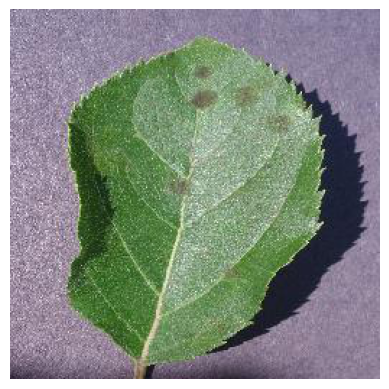

In [10]:
image_path = '/Users/arinpramanick/Desktop/Datasets/plantvillage dataset/color/Apple___Apple_scab/0a769a71-052a-4f19-a4d8-b0f0cb75541c___FREC_Scab 3165.JPG'
img = mpimg.imread(image_path)

print(img.shape)

#displaying the image
plt.imshow(img)
plt.axis('off')

plt.show()

In [11]:
#Setting the image parameters

img_size = 224
batch_size = 32

In [12]:
data_gen = ImageDataGenerator(
    rescale = 1./255,  #rescale the data to 0-1 range
    validation_split = 0.2 #20% data to be used for validation
)

In [13]:
#Train Generator

train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size = (img_size,img_size),  #all images are made to be of same size
    batch_size = batch_size,
    subset = 'training',
    class_mode = 'categorical'
)

Found 43456 images belonging to 38 classes.


In [ ]:
#Validation Generator(Testing data)

validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size = (img_size,img_size),
    batch_size = batch_size,
    subset = 'validation',
    class_mode = 'categorical'
)

Convolution Neural Network

In [15]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation = 'relu' , input_shape = (img_size , img_size , 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten()) #Converting to 1d vectors by Flatten() function
model.add(layers.Dense(256,activation = 'relu'))
model.add(layers.Dense(train_generator.num_classes,activation = 'softmax')) #train_generator.num_classes always contains the number of classes



/Users/arinpramanick/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
#compiling the model

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [18]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size, #Number of steps per epoch
    epochs = 5, #Number of epochs
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size
)

Epoch 1/5


/Users/arinpramanick/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1903s 1s/step - accuracy: 0.5922 - loss: 1.8782 - val_accuracy: 0.8475 - val_loss: 0.4857
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 81us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 1.0131
Epoch 3/5


2024-08-22 17:52:02.256646: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Users/arinpramanick/anaconda3/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-08-22 17:52:02.349861: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1886s 1s/step - accuracy: 0.9104 - loss: 0.2811 - val_accuracy: 0.8765 - val_loss: 0.4080
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 59us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 8.3446e-07
Epoch 5/5


2024-08-22 18:23:28.909147: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1829s 1s/step - accuracy: 0.9649 - loss: 0.1102 - val_accuracy: 0.8796 - val_loss: 0.4571


In [19]:
print('Evaluating model....')
val_loss , val_accuracy = model.evaluate(validation_generator , steps = validation_generator.samples // batch_size)
print(f'Validation Loss : {val_loss*100: .2f}')
print(f'Validation Accuracy : {val_accuracy*100: .2f}')

Evaluating model....
339/339 ━━━━━━━━━━━━━━━━━━━━ 99s 292ms/step - accuracy: 0.8779 - loss: 0.4578
Validation Loss :  45.69
Validation Accuracy :  87.96


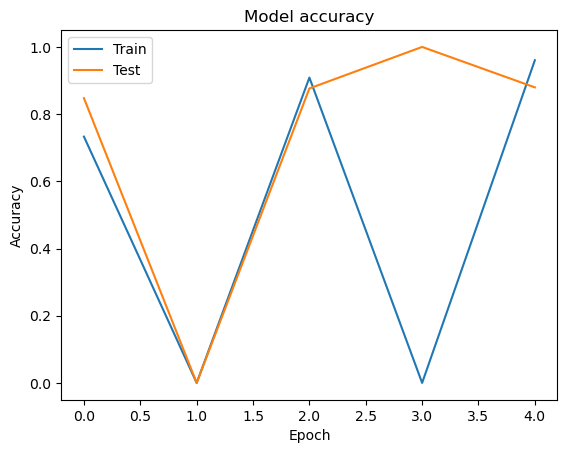

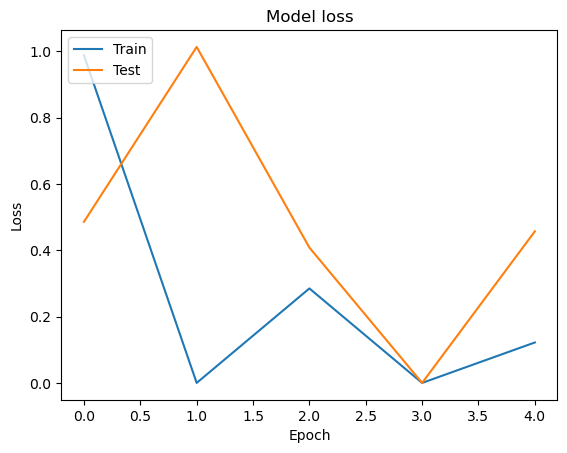

In [20]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Building the predictive system**

In [27]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name
     

In [28]:
class_indices = {v : k for k , v in train_generator.class_indices.items()}

In [29]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [24]:
#saving the class names as json file
json.dump(class_indices , open('class_indices.json' , 'w'))

In [30]:
# Example Usage
image_path = '/Users/arinpramanick/Downloads/Apple.JPG'
#image_path = '/content/test_blueberry_healthy.jpg'
#image_path = '/content/test_potato_early_blight.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
Predicted Class Name: Apple___Black_rot


In [31]:
import pickle

In [33]:
with open('model_pickle' , 'wb') as Plant_Disease_Detection:
    pickle.dump(model,Plant_Disease_Detection)

In [37]:
model.save('plant_disease_prediction.h5')
# keras.saving.save_model(model , 'plant_disease_prediction.keras')